In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)

Reading the datafiles

In [2]:
encounters = pd.read_csv("encounters.csv")
patients = pd.read_csv("patients.csv")
conditions = pd.read_csv("conditions.csv")
allergies = pd.read_csv("allergies.csv")
observations = pd.read_csv("observations.csv")

In [3]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS',
       'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST',
       'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [4]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [5]:
conditions.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [6]:
conditions['CODE'].nunique()

155

In [7]:
allergies.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [8]:
allergies['CODE'].nunique()

15

In [9]:
observations.columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS',
       'TYPE'],
      dtype='object')

What are the different observations recorded for the patients?

In [10]:

observations[['DESCRIPTION','UNITS']].drop_duplicates().head(181)

,DESCRIPTION,UNITS
0,Body Height,cm
6,Pain severity - 0-10 verbal numeric rating [Sc...,{score}
7,Body Weight,kg
8,Weight-for-length Per age and sex,%
12,Head Occipital-frontal circumference,cm
13,Diastolic Blood Pressure,mm[Hg]
14,Systolic Blood Pressure,mm[Hg]
15,Heart rate,/min
16,Respiratory rate,/min
17,Leukocytes [#/volume] in Blood by Automated count,10*3/uL


Combining conditions data with allergies data

In [11]:
illness = conditions.append(allergies)

Joining Patient's data with illness data. Here illness is either health condition or allergy

In [12]:
patient_illness = pd.merge(patients, illness, left_on='Id', right_on='PATIENT')

In [13]:
patient_illness.columns


Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

Dropping the unnecessary columns from patient

In [14]:
patient_illness.drop(['SSN', 'DRIVERS', 'PASSPORT', 'PREFIX','FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE' ], axis=1, inplace=True)

In [15]:
patient_illness.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE',
       'DESCRIPTION'],
      dtype='object')

We will consider patients who are alive

In [16]:
patient_illness = patient_illness[ patient_illness['DEATHDATE'].isnull() ]
patient_illness.drop(['DEATHDATE','DESCRIPTION','PATIENT'], axis=1, inplace=True)

In [17]:
patient_illness.head()

,Id,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,START,STOP,ENCOUNTER,CODE
0,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,M,white,nonhispanic,M,1966-12-22,1967-01-05,29a66882-7e22-4c00-8cf2-c0204e4d5764,283385000
1,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,M,white,nonhispanic,M,1969-06-18,1969-07-09,e4f7e407-acbb-4ff9-b45a-1cd8945377f5,444814009
2,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,M,white,nonhispanic,M,1975-05-16,1975-06-06,2bb3a1e0-c528-4867-9958-0c73a20fe350,444814009
3,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,M,white,nonhispanic,M,1977-05-12,1977-08-10,2abb8af7-7f51-46f7-a182-82f6d7bd8384,16114001
4,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,M,white,nonhispanic,M,1978-12-26,1979-01-02,931c8bf3-3ea7-47d9-b316-9d6b61e80b94,444814009


Encoding the categorical variables

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [19]:
patient_illness['MARITAL'] = patient_illness['MARITAL'].fillna('NA')
patient_illness['MARITAL'] = le.fit_transform(patient_illness['MARITAL'])
patient_illness['RACE'] = le.fit_transform(patient_illness['RACE'])
patient_illness['ETHNICITY'] = le.fit_transform(patient_illness['ETHNICITY'])
patient_illness['GENDER'] = le.fit_transform(patient_illness['GENDER'])



In [20]:
patients.isnull().sum()

Id                         0
BIRTHDATE                  0
DEATHDATE               9999
SSN                        0
DRIVERS                 2010
PASSPORT                2544
PREFIX                  2276
FIRST                      0
LAST                       0
SUFFIX                 11527
MAIDEN                  8385
MARITAL                 3617
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
ZIP                     5462
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: int64

In [21]:
encounters.isnull().sum()

Id                          0
START                       0
STOP                        0
PATIENT                     0
PROVIDER                    0
PAYER                       0
ENCOUNTERCLASS              0
CODE                        0
DESCRIPTION                 0
BASE_ENCOUNTER_COST         0
TOTAL_CLAIM_COST            0
PAYER_COVERAGE              0
REASONCODE             950599
REASONDESCRIPTION      950599
dtype: int64

In [22]:
observations.isnull().sum()

DATE                 0
PATIENT              0
ENCOUNTER      1497180
CODE                 0
DESCRIPTION          0
VALUE                0
UNITS           569662
TYPE                 0
dtype: int64

### We will take 1st July 2015 as the cutoff date for the predictions


Illness(conditions or allergies) with start date before this cut off date will be used as features (X variables).
Illness(conditions or allergies) with start date after this cut off date will be used as Target(Y variable)

In [23]:
patient_illness_x=patient_illness[patient_illness['START']<'2015-07-01']
patient_illness_y=patient_illness[patient_illness['START']>='2015-07-01']

We will now define the illness for which we will be performing the prediction
Here 59621000 is the code for Hypertension

In [24]:
cond_code = 59621000

In [25]:
patient_cond_start = patient_illness_x[patient_illness_x['CODE'] == cond_code ][['Id','START']].sort_values('START', ascending=False)

In [26]:
patient_cond_start.rename(columns={'START':'CONDITION_START'}, inplace='True')

In [27]:
patient_illness_x1 = patient_illness_x[['Id','CODE']]

Function to identify if patient has the given health condition

In [28]:
def has_condition(x):
    if x == 59621000:
        return 1
    else:
        return 0



condition_flg is the target variable

In [29]:
patient_illness_x1['condition_flg'] = patient_illness_x1['CODE'].map(has_condition)

<ipython-input-29-fcc3615236a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_illness_x1['condition_flg'] = patient_illness_x1['CODE'].map(has_condition)


In [30]:
patient_illness_x1 = patient_illness_x1[['Id','condition_flg']].groupby(['Id']).max(['condition_flg'])

In [31]:
patient_illness_x1

,condition_flg
Id,
0002edb7-9477-4bc9-a2b7-d5137e7e9ed4,0
00059e58-4f1f-49de-b008-3ec6c2aac7e7,0
0007fa20-c7b2-4764-b4f1-c3e96b241082,0
000f6134-cefd-41f8-8bc7-144221c7e07e,0
000ffb8b-d295-44a7-9d88-45d39ea9d2ba,1
...,...
ffe9b100-c774-4c90-bde9-d96a3c9b3d01,0
fff28666-e162-4fe2-86f5-7d99754effe0,0
fff5c1ca-310b-4038-a057-57a571f1dbe6,0


In [32]:
patient_illness_x1.reset_index(inplace=True)

In [33]:
patient_illness_x1.condition_flg.value_counts()

0    6998
1    2281
Name: condition_flg, dtype: int64

In [34]:
patient_illness_x = pd.merge(patient_illness_x,patient_cond_start, on='Id', how='left')

Filling the default date value as 2100-12-31 for the patients not suffering from the given condition

In [35]:
patient_illness_x['CONDITION_START'].fillna('2100-12-31', inplace=True)

For a patient who already had the given health conditions, we will use start date of that health condition as cut off date for dividing the patient's timeline

In [36]:
patient_illness_x = patient_illness_x[ patient_illness_x['CONDITION_START']>patient_illness_x['START'] ]

In [37]:
patient_illness_x = pd.merge(patient_illness_x, patient_illness_x1, on='Id',how='inner')

In [38]:
#conditions[conditions['PATIENT'] =='000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [39]:
#patient_illness_x[ patient_illness_x['Id'] =='000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [40]:
patient_illness_x.head(100)

,Id,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,START,STOP,ENCOUNTER,CODE,CONDITION_START,condition_flg
0,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1966-12-22,1967-01-05,29a66882-7e22-4c00-8cf2-c0204e4d5764,283385000,2100-12-31,0
1,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1969-06-18,1969-07-09,e4f7e407-acbb-4ff9-b45a-1cd8945377f5,444814009,2100-12-31,0
2,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1975-05-16,1975-06-06,2bb3a1e0-c528-4867-9958-0c73a20fe350,444814009,2100-12-31,0
3,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1977-05-12,1977-08-10,2abb8af7-7f51-46f7-a182-82f6d7bd8384,16114001,2100-12-31,0
4,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1978-12-26,1979-01-02,931c8bf3-3ea7-47d9-b316-9d6b61e80b94,444814009,2100-12-31,0
5,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1986-11-28,1986-12-19,76bb3a8f-bfff-449b-a937-0bfc1fe1b62b,444814009,2100-12-31,0
6,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1993-12-01,1993-12-08,febb710b-275d-4942-adca-2f0f4ccefab0,195662009,2100-12-31,0
7,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1995-03-09,1995-03-30,aca8b32f-6dcc-4f2e-b40c-d61dca546364,44465007,2100-12-31,0
8,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1998-04-23,NaN,056c94ab-7ee0-4069-9f6c-d272bb4e1885,15777000,2100-12-31,0
9,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,0,4,1,1,1998-04-23,NaN,056c94ab-7ee0-4069-9f6c-d272bb4e1885,271737000,2100-12-31,0


Now we will work on the target variable (to identify if a patient suffered from the given health condition post cut off date or not)

In [41]:
patient_illness_y [patient_illness_y['CODE'] == cond_code].sort_values('START', ascending=False)

,Id,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,START,STOP,ENCOUNTER,CODE
34268,6b70ab82-548d-464b-8e57-c45e884a182a,2002-02-05,1,0,1,0,2020-03-31,NaN,aa819278-cab4-4ff0-be4e-13a650f5e4bc,59621000
95874,d53d3bd8-ec96-4f7e-ab5e-5540c2d302a8,2002-01-20,1,4,1,0,2020-03-15,NaN,979fd240-d4db-4cb2-ab07-1078860cb420,59621000
69712,9311831c-02c9-445b-ad14-57ad9d636dee,2002-01-17,1,4,1,0,2020-03-12,NaN,1aeb2834-2c19-4dfc-80a4-d9f70b7c1a5e,59621000
82031,a8c14fe1-a067-43eb-a9d5-0f537f63184d,2002-01-15,1,1,1,0,2020-03-10,NaN,d902eda8-b229-4206-8040-35ffaaec1870,59621000
46762,9162a0be-0eba-4936-a99a-a5822a77195c,2001-12-26,1,4,1,1,2020-02-19,NaN,035206c5-10f7-4107-85c1-6abca71f52ac,59621000
257678,6aa88035-d878-4a07-b080-483c4f875ab7,2001-12-24,1,4,1,0,2020-02-17,NaN,eb2c9024-3663-48fd-baa7-749d40f8576f,59621000
16357,54eaaf55-fcb9-4df4-a44d-46384cf876e5,2001-12-22,1,4,1,0,2020-02-15,NaN,2605da7c-69db-43f7-88ba-230f07e59a3d,59621000
96010,40a06325-9b1a-4764-8d10-4c1dc1cfb6ea,2001-12-21,1,4,0,1,2020-02-14,NaN,31446257-03bb-4f7f-8618-5a478ed0f5a2,59621000
42275,829d5b60-a026-42f4-b069-49afa073d021,2001-12-20,1,4,1,0,2020-02-13,NaN,22dbc1d4-ff29-4d16-9083-e582b292d782,59621000
166387,d3356e8e-efea-4d16-90dc-74bd86529a77,2001-11-23,1,4,1,1,2020-01-17,NaN,efbef97b-1b83-475b-b896-7923efe8d1b2,59621000


In [42]:
patient_illness_y = patient_illness_y[['Id','CODE']]

In [43]:
patient_illness_y.head(5)

,Id,CODE
29,2d0a9468-9cc7-47c6-a757-2944fb7a754d,195662009
30,2d0a9468-9cc7-47c6-a757-2944fb7a754d,444814009
31,2d0a9468-9cc7-47c6-a757-2944fb7a754d,162864005
42,600960a6-6ed0-4bc3-8476-1143c592ea66,10509002
43,600960a6-6ed0-4bc3-8476-1143c592ea66,72892002


In [44]:
patient_illness_y['condition_flg'] = patient_illness_y['CODE'].map(has_condition)

In [45]:
patient_illness_y['condition_flg'].value_counts()

0    23152
1      238
Name: condition_flg, dtype: int64

In [46]:
patient_illness_y = patient_illness_y[['Id','condition_flg']].groupby(['Id']).max('condition_flg')

In [47]:
patient_illness_y.condition_flg.value_counts()

0    8444
1     238
Name: condition_flg, dtype: int64

Merging the Features and Target variables of the patient's illness data

In [48]:
final_df = pd.merge(patient_illness_x, patient_illness_y, on='Id',how='inner')

In [49]:
final_df['condition_flg_y'] = final_df['condition_flg_x'] | final_df['condition_flg_y']

In [50]:
final_df.condition_flg_y.value_counts()

0    111165
1     22162
Name: condition_flg_y, dtype: int64

In [51]:
final_df.condition_flg_y.value_counts()

0    111165
1     22162
Name: condition_flg_y, dtype: int64

In [52]:
final_df.drop(['CONDITION_START','condition_flg_x'], axis=1,inplace=True)

Function to find the age

In [53]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day)) - 5
final_df['Age'] = final_df['BIRTHDATE'].apply(age)


In [54]:
enc = encounters[['Id','ENCOUNTERCLASS']].rename(columns={'Id':'ENC_ID'})

In [55]:
enc.columns

Index(['ENC_ID', 'ENCOUNTERCLASS'], dtype='object')

In [56]:
final_df = pd.merge(final_df,enc, left_on='ENCOUNTER', right_on='ENC_ID', how='left')

In [57]:
final_df.drop(['BIRTHDATE','START','STOP'], axis=1, inplace=True)

In [58]:
final_df

,Id,MARITAL,RACE,ETHNICITY,GENDER,ENCOUNTER,CODE,condition_flg_y,Age,ENC_ID,ENCOUNTERCLASS
0,2d0a9468-9cc7-47c6-a757-2944fb7a754d,1,1,1,1,4548cd8e-7578-46b5-8028-2b2164b00b6d,444814009,0,15,4548cd8e-7578-46b5-8028-2b2164b00b6d,ambulatory
1,2d0a9468-9cc7-47c6-a757-2944fb7a754d,1,1,1,1,3c6727fd-c572-481c-85ae-9832b147a021,444814009,0,15,3c6727fd-c572-481c-85ae-9832b147a021,ambulatory
2,2d0a9468-9cc7-47c6-a757-2944fb7a754d,1,1,1,1,259ded9d-aaf8-48f9-a32b-c255140c0cd9,444814009,0,15,259ded9d-aaf8-48f9-a32b-c255140c0cd9,ambulatory
3,2d0a9468-9cc7-47c6-a757-2944fb7a754d,1,1,1,1,799fa549-801b-47bd-b6ca-592d8e7c931e,444814009,0,15,799fa549-801b-47bd-b6ca-592d8e7c931e,ambulatory
4,2d0a9468-9cc7-47c6-a757-2944fb7a754d,1,1,1,1,87284607-c363-4388-85aa-53d3e9c2da37,62106007,0,15,87284607-c363-4388-85aa-53d3e9c2da37,emergency
...,...,...,...,...,...,...,...,...,...,...,...
133322,0b176731-1dab-49ed-8748-f4e2829b24e7,2,4,1,1,fa06b348-8716-4c7b-8059-5766067527c7,65363002,1,82,fa06b348-8716-4c7b-8059-5766067527c7,outpatient
133323,0b176731-1dab-49ed-8748-f4e2829b24e7,2,4,1,1,1b258fc4-e2c8-456c-9636-f1c65d2071e0,444814009,1,82,1b258fc4-e2c8-456c-9636-f1c65d2071e0,ambulatory
133324,0b176731-1dab-49ed-8748-f4e2829b24e7,2,4,1,1,66dc6581-ed75-41db-b3f9-8758c346caaa,65363002,1,82,66dc6581-ed75-41db-b3f9-8758c346caaa,outpatient
133325,0b176731-1dab-49ed-8748-f4e2829b24e7,2,4,1,1,10a4ab81-20a7-454e-98a0-8158edcbb2b2,10509002,1,82,10a4ab81-20a7-454e-98a0-8158edcbb2b2,ambulatory


In [59]:
#final_df[ final_df['Id'] =='000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [60]:
final_df.reset_index(inplace=True)
final_df.set_index(['Id', 'ENCOUNTER'], inplace=True)


In [61]:
final_df.CODE = final_df.CODE.map(str)

In [62]:
final_df.dtypes

index               int64
MARITAL             int32
RACE                int32
ETHNICITY           int32
GENDER              int32
CODE               object
condition_flg_y     int64
Age                 int64
ENC_ID             object
ENCOUNTERCLASS     object
dtype: object

Converting the categorical variables 'CODE','ENCOUNTERCLASS' into dummy variables

In [63]:
illness_dummies = pd.get_dummies(final_df[['CODE','ENCOUNTERCLASS']], prefix_sep='_', drop_first=False)

In [64]:
#illness_dummies.loc['000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [65]:
#illness_dummies.groupby('Id').max().loc['000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [66]:
final_df = pd.merge(final_df,illness_dummies,on=['Id','ENCOUNTER'], how='inner')

In [67]:
final_df.head()

index  \
Id                                   ENCOUNTER                                     
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d      0   
                                     3c6727fd-c572-481c-85ae-9832b147a021      1   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9      2   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e      3   
                                     87284607-c363-4388-85aa-53d3e9c2da37      4   

                                                                           MARITAL  \
Id                                   ENCOUNTER                                       
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d        1   
                                     3c6727fd-c572-481c-85ae-9832b147a021        1   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9        1   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e        1   
                                     87284607-c363-4388-85aa-53d3e9c2da37        1   

                                                                           RACE  \
Id                                   ENCOUNTER                                    
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d     1   
                                     3c6727fd-c572-481c-85ae-9832b147a021     1   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9     1   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e     1   
                                     87284607-c363-4388-85aa-53d3e9c2da37     1   

                                                                           ETHNICITY  \
Id                                   ENCOUNTER                                         
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d          1   
                                     3c6727fd-c572-481c-85ae-9832b147a021          1   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9          1   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e          1   
                                     87284607-c363-4388-85aa-53d3e9c2da37          1   

                                                                           GENDER  \
Id                                   ENCOUNTER                                      
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d       1   
                                     3c6727fd-c572-481c-85ae-9832b147a021       1   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9       1   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e       1   
                                     87284607-c363-4388-85aa-53d3e9c2da37       1   

                                                                                CODE  \
Id                                   ENCOUNTER                                         
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d  444814009   
                                     3c6727fd-c572-481c-85ae-9832b147a021  444814009   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9  444814009   
                                     799fa549-801b-47bd-b6ca-592d8e7c931e  444814009   
                                     87284607-c363-4388-85aa-53d3e9c2da37   62106007   

                                                                           condition_flg_y  \
Id                                   ENCOUNTER                                               
2d0a9468-9cc7-47c6-a757-2944fb7a754d 4548cd8e-7578-46b5-8028-2b2164b00b6d                0   
                                     3c6727fd-c572-481c-85ae-9832b147a021                0   
                                     259ded9d-aaf8-48f9-a32b-c255140c0cd9                0   
 

In [68]:
#pd.set_option('display.max_columns', 200)
#final_df.loc['000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [69]:
final_df.drop(['CODE','ENCOUNTERCLASS'], axis=1, inplace=True)

Combining the illness data with the patient's observations data like weight etc which is taken at the time of doctor's visit encounter

In [70]:
#final_merged_df = final_df.merge(observations_dedup_piv, left_index=True, right_index=True, how='left')
final_merged_df = final_df

In [71]:
final_merged_df.reset_index(inplace=True)


In [72]:
print(final_merged_df.columns)

Index(['Id', 'ENCOUNTER', 'index', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER',
       'condition_flg_y', 'Age', 'ENC_ID',
       ...
       'CODE_92691004', 'CODE_93761005', 'CODE_95417003',
       'CODE_97331000119101', 'ENCOUNTERCLASS_ambulatory',
       'ENCOUNTERCLASS_emergency', 'ENCOUNTERCLASS_inpatient',
       'ENCOUNTERCLASS_outpatient', 'ENCOUNTERCLASS_urgentcare',
       'ENCOUNTERCLASS_wellness'],
      dtype='object', length=161)


In [73]:
#final_merged_df[ final_merged_df.Id == '000ffb8b-d295-44a7-9d88-45d39ea9d2ba'].head(5)

In [74]:
final_merged_df.drop(['ENCOUNTER'],axis=1, inplace=True)

In [75]:
final_merged_df.set_index(['Id'], inplace=True)


In [76]:
final_merged_df = final_merged_df.fillna(0)

In [77]:
#final_merged_df.loc['000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [78]:
final_merged_df = final_merged_df.groupby(['Id','MARITAL','RACE','ETHNICITY','GENDER','condition_flg_y','Age']).sum()

In [79]:
#final_merged_df.loc['000ffb8b-d295-44a7-9d88-45d39ea9d2ba']

In [80]:
final_merged_df.drop(['index'], axis=1, inplace=True)
#final_merged_df = final_merged_df.pivot(index=['PATIENT','ENCOUNTER','MARITAL','RACE','ETHNICITY','GENDER','prediabetes_flg_y','Age','2093-3','4548-4','6690-2','718-7','72514-3','8302-2','8462-4'], columns='CODE' , values='VALUE')

In [81]:
final_merged_df.reset_index( inplace=True)

In [82]:
final_merged_df.head(5)

,Id,MARITAL,RACE,ETHNICITY,GENDER,condition_flg_y,Age,CODE_10509002,CODE_109838007,CODE_110030002,...,CODE_92691004,CODE_93761005,CODE_95417003,CODE_97331000119101,ENCOUNTERCLASS_ambulatory,ENCOUNTERCLASS_emergency,ENCOUNTERCLASS_inpatient,ENCOUNTERCLASS_outpatient,ENCOUNTERCLASS_urgentcare,ENCOUNTERCLASS_wellness
0,0002edb7-9477-4bc9-a2b7-d5137e7e9ed4,2,4,1,1,0,75,5,0,0,...,0,0,0,0,20,5,0,2,0,2
1,00059e58-4f1f-49de-b008-3ec6c2aac7e7,0,4,1,0,0,44,1,0,0,...,0,0,0,0,15,0,0,1,0,1
2,0007fa20-c7b2-4764-b4f1-c3e96b241082,1,4,1,0,0,18,0,0,0,...,0,0,0,0,2,2,0,1,0,0
3,000f6134-cefd-41f8-8bc7-144221c7e07e,0,4,1,1,0,77,1,0,0,...,0,0,0,0,21,8,0,3,0,2
4,000ffb8b-d295-44a7-9d88-45d39ea9d2ba,0,4,1,1,1,56,2,0,0,...,0,0,0,0,6,3,0,1,0,9


In [83]:
final_merged_df.dtypes

Id                           object
MARITAL                       int64
RACE                          int64
ETHNICITY                     int64
GENDER                        int64
condition_flg_y               int64
Age                           int64
CODE_10509002                 uint8
CODE_109838007                uint8
CODE_110030002                uint8
CODE_124171000119105          uint8
CODE_126906006                uint8
CODE_127013003                uint8
CODE_128613002                uint8
CODE_1501000119109            uint8
CODE_1551000119108            uint8
CODE_156073000                uint8
CODE_157141000119108          uint8
CODE_15724005                 uint8
CODE_15777000                 uint8
CODE_16114001                 uint8
CODE_161621004                uint8
CODE_161622006                uint8
CODE_162864005                uint8
CODE_1734006                  uint8
CODE_185086009                uint8
CODE_19169002                 uint8
CODE_192127007              

In [84]:

Y = final_merged_df['condition_flg_y']
X = final_merged_df.drop(['condition_flg_y','Id'], axis=1)

In [85]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#X = pca.fit_transform(X)

In [86]:
#exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
#cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
#plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal component index')
#plt.legend(loc='best')
#plt.tight_layout()
#plt.show()

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=4)

## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(C= .2, max_iter=1000, solver='liblinear')

In [89]:
 lreg.fit(X_train, Y_train)

LogisticRegression(C=0.2, max_iter=1000, solver='liblinear')

In [90]:
Y_pred = lreg.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

results = pd.DataFrame([['Logisctic Regression', acc, prec, recall, f1]],
                                   columns=['Model','Accuracy','Precision','Recall','F1 Score'])
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score
0  Logisctic Regression  0.881522   0.868035  0.666667   0.75414


In [92]:
print(confusion_matrix(Y_test, Y_pred))

[[1140   45]
 [ 148  296]]


Using Logistic Regression, we are getting the accuracy of 88% (for detecting Hypertension)

In [93]:
#print(*Y_test)

In [94]:
Y_train.value_counts()

0    4733
1    1783
Name: condition_flg_y, dtype: int64

In [95]:
Y_test.value_counts()

0    1185
1     444
Name: condition_flg_y, dtype: int64

## DECISION TREE

In [96]:
from sklearn.tree import DecisionTreeClassifier


In [97]:
results =  pd.DataFrame(columns = ['Model','max feature','max dep','Accuracy','Precision','Recall','F1 Score'])
for ne in range(20,150,10):
    for dep in range(20,85,10):
        dtc = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features=ne,max_depth=dep)
        dtc.fit(X_train, Y_train)
        Y_pred = dtc.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        prec = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        result = pd.DataFrame([['Decision Tree',ne, dep, acc, prec, recall, f1]],
                                   columns=['Model','max feature','max dep','Accuracy','Precision','Recall','F1 Score'])
        results =  results.append(result)
print(results)


           Model max feature max dep  Accuracy  Precision    Recall  F1 Score
0  Decision Tree          20      20  0.840393   0.730000  0.657658  0.691943
0  Decision Tree          20      30  0.818907   0.671264  0.657658  0.664391
0  Decision Tree          20      40  0.815224   0.660674  0.662162  0.661417
0  Decision Tree          20      50  0.826888   0.685780  0.673423  0.679545
0  Decision Tree          20      60  0.850215   0.736967  0.700450  0.718245
0  Decision Tree          20      70  0.821977   0.673423  0.673423  0.673423
0  Decision Tree          20      80  0.826888   0.674569  0.704955  0.689427
0  Decision Tree          30      20  0.839165   0.725248  0.659910  0.691038
0  Decision Tree          30      30  0.826888   0.688372  0.666667  0.677346
0  Decision Tree          30      40  0.834254   0.695946  0.695946  0.695946
0  Decision Tree          30      50  0.829343   0.678112  0.711712  0.694505
0  Decision Tree          30      60  0.851443   0.724444  0.734

In [98]:
print(confusion_matrix(Y_test, Y_pred))

[[1040  145]
 [ 119  325]]


In [99]:
results [results.Recall == results.Recall.max() ]

,Model,max feature,max dep,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,130,70,0.845918,0.704017,0.75,0.726281


Using Decision Tree Classifier, we are getting the accuracy of 85% approx (for detecting Hypertension) but precision is not so good (around 70%)

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
results =  pd.DataFrame(columns = ['Model','estimator','max dep','Accuracy','Precision','Recall','F1 Score'])
for ne in range(100,1000,100):
    for dep in range(20,80,10):
        rfc = RandomForestClassifier(n_estimators =ne , criterion='entropy', max_depth= dep)
        rfc.fit(X_train, Y_train)
        Y_pred = rfc.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        prec = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        result = pd.DataFrame([['RandomForest',ne, dep, acc, prec, recall, f1]],
                                   columns=['Model','estimator','max dep','Accuracy','Precision','Recall','F1 Score'])
        results =  results.append(result)
print(results)
        

          Model estimator max dep  Accuracy  Precision    Recall  F1 Score
0  RandomForest       100      20  0.880909   0.861272  0.671171  0.754430
0  RandomForest       100      30  0.882136   0.864162  0.673423  0.756962
0  RandomForest       100      40  0.881522   0.859599  0.675676  0.756620
0  RandomForest       100      50  0.883978   0.869565  0.675676  0.760456
0  RandomForest       100      60  0.882136   0.864162  0.673423  0.756962
0  RandomForest       100      70  0.882750   0.875371  0.664414  0.755442
0  RandomForest       200      20  0.882750   0.866667  0.673423  0.757921
0  RandomForest       200      30  0.887047   0.871429  0.686937  0.768262
0  RandomForest       200      40  0.880909   0.861272  0.671171  0.754430
0  RandomForest       200      50  0.885206   0.874636  0.675676  0.762389
0  RandomForest       200      60  0.887047   0.880117  0.677928  0.765903
0  RandomForest       200      70  0.883364   0.873529  0.668919  0.757653
0  RandomForest       300

In [101]:
results [results.Recall == results.Recall.max() ]

,Model,estimator,max dep,Accuracy,Precision,Recall,F1 Score
0,RandomForest,200,30,0.887047,0.871429,0.686937,0.768262


In [110]:
rfc = RandomForestClassifier(criterion='gini', max_depth= 30, max_features= 0.5, n_estimators= 200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

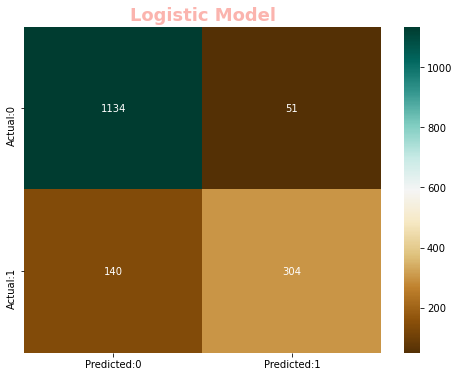

In [111]:
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
#cf=confusion_matrix(y_test,predictions)
cf_matrix=pd.DataFrame(data=confusion_matrix(Y_test, Y_pred),columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='BrBG')
fm={'size':18,'color':'#fbb4ae','weight':'bold'}
plt.title('Logistic Model',**fm)
plt.show()

In [112]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
result = pd.DataFrame([['RFC', acc, prec, recall, f1]],
                                   columns=['Model','Accuracy','Precision','Recall','F1 Score'])
print(result)

  Model  Accuracy  Precision    Recall  F1 Score
0   RFC   0.88275   0.856338  0.684685  0.760951


Using Random Forest Classifier, we are getting the accuracy of 88.5% (for detecting Hypertension)

# Hyperparameter Tuning

In [113]:
from sklearn.ensemble import RandomForestClassifier
parameters ={'max_depth': [ 30,  50, 60, 90],
     'criterion' : ['gini'],
     'max_features': [0.3,0.5,0.7],
     'min_samples_leaf': [3,7,12],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400]}
from sklearn.model_selection import  GridSearchCV
mod = RandomForestClassifier()
grid_search = GridSearchCV(mod, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_result= grid_search.fit(X_train,Y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 0.3, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 400}
Best Score:  0.8990177221984188


With parameters suggested by Grid Search cross validator, we can achieve approx 90% accuracy

# Conclusion: We are able to detect a future health condition(hypertension in this case) of a patient with 88.5% accuracy  and equally good precision but recall and F1 score are in range 65-75%